In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd


## Getting Started with the AIXD Toolbox
In this notebook, the basic functionalities of the toolbox are shown on a simple analytical example. It functions as a domain-independent introduction example for the AIXD Toolbox. 

The notebook covers the following steps:
1. Definition of parametric problem
2. Data set creation
3. Data set exploration
4. Model set-up, training and evaluation
5. Model deployment





### 1. Definition of parametric problem

In this introductory example, we will train machine learning models to learn two analytical functions. These functions are defined as follows:



We are training machine learning models to understand the relationships defined by the two analytical functions. In this example the functions Y1 and Y2 are dependent on X1 and X2.
Due to the low dimensionality of the example problem we can plot the two functions.

### 2. Data set creation

#### Define your design parameter and perfromance attributes

Our design parameters are therefore X1 and X2, and our performance attributes Y1 and Y2. First we need to define these.

For this example we only have a continuous design parameter, for which we create a DataObject of the type Real. Here we define an interval as its domain.


In [2]:
from aaad.data.data_blocks import DesignParameters
from aaad.data.data_objects import DataReal
from aaad.data.domain_def import Interval


obj_list=[
    # Geometric Parameter
    DataReal(name='L', dim=1, domain=Interval(2000, 18000)), 
    DataReal(name='b1', dim=1, domain=Interval(3000, 20000)),
    DataReal(name='t_p', dim=1, domain=Interval(200, 1200)),
    DataReal(name='t_w', dim=1, domain=Interval(200, 1200)),
    DataReal(name='h_w', dim=1, domain=Interval(2000, 5000)),

    # Reinforcement Parameter
    DataReal(name='d1_plate', dim=1, domain=Interval(10, 30)),
    DataReal(name='d4_plate', dim=1, domain=Interval(10, 30)),
    DataReal(name='d2_plate', dim=1, domain=Interval(10, 30)),
    DataReal(name='s_plate', dim=1, domain=Interval(100, 500)),

    DataReal(name='d1_walls', dim=1, domain=Interval(10, 30)),
    DataReal(name='d4_walls', dim=1, domain=Interval(10, 30)),
    DataReal(name='s_walls', dim=1, domain=Interval(100, 500)),

    DataReal(name='fcc', dim=1, domain=Interval(25, 50)),
    DataReal(name='fsy', dim=1, domain=Interval(300, 450)),

    DataReal(name='s', dim=1, domain=Interval(0.1, 0.9)),
    DataReal(name='beta', dim=1, domain=Interval(-50, 50)),
    ]
design_parameters = DesignParameters(name='design_par', dobj_list=obj_list)

And similar we define the performance attributes:

In [3]:
from aaad.data.data_blocks import PerformanceAttributes


obj_list=[
    DataReal(name="eta_min_tot", dim=1), 
    DataReal(name="AP", dim=1), 
    DataReal(name="GWP", dim=1), 
    DataReal(name="ADP-minerals-metals", dim=1), 
    DataReal(name="ADP-fossil", dim=1), 
    DataReal(name="ODP", dim=1), 
    DataReal(name="POCP", dim=1),
    ]

performance_attributes = PerformanceAttributes(name='perf_att', dobj_list=obj_list)

C:\Users\kuhnso\Documents\GitHub\aaad_renku\src\aaad\data\data_objects.py:472: UserWarning: Expected to get an object of class <Interval> as a domain. One created automatically with range 0 to 100
  warnings.warn("Expected to get an object of class <Interval> as a domain. One created automatically with range 0 to 100")


#### Create your dataset object

Using the defined design parameters and performance attributes, we initialize the dataset object. Here we just define the structure of the data set, so far no actual data is saved in the data set. The function also creates a dataset folder in the directory of the notebook.


In [4]:
from aaad.data.dataset import Dataset

dataset = Dataset(
     name="cfb_sbb",
     design_par=design_parameters,
     perf_attributes=performance_attributes,
     overwrite = True)


#### Import data to your dataset object

If we have data available we can directly import our data into the dataset from our dataframe. Here we save our data from the dataFrame to the dataset object we have created before.


In [5]:
idx_s=200
xyz_file_name='CFBData\\{}_Batch\\{}_CFB_xyz.csv'.format(idx_s,idx_s)
df = pd.read_csv(xyz_file_name,index_col=0)
df

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,s_plate,...,w_plate_steel,vol_walls_conc,vol_walls_steel,w_walls_steel,GWP,AP,ADP-minerals-metals,ADP-fossil,ODP,POCP
0,0,0,3264.911067,16765.132982,531.656436,621.775968,2604.161687,24.228625,13.427572,206.036846,...,1728.540762,54.292379,0.547000,4293.951771,26502.735589,43.172495,0.079209,176678.087777,0.000233,7.071713
1,1,1,5361.115418,17451.415474,744.304389,275.279703,3820.154356,17.838816,12.481430,218.545430,...,2011.240414,36.704199,0.383421,3009.852814,33129.329779,52.490056,0.105244,199064.143643,0.000197,6.932669
2,2,2,7197.928187,12610.611102,792.070735,496.244565,4273.476243,22.587214,26.028824,128.850732,...,6409.277052,53.486378,0.474510,3724.902312,40117.512614,65.950366,0.117371,276285.658703,0.000391,11.478810
3,3,3,4946.728918,16364.414176,373.131286,477.965439,3363.099660,24.607351,29.281128,135.563137,...,6446.134834,52.609805,0.807100,6335.737246,21314.817463,40.731683,0.038084,212491.452481,0.000484,11.354266
4,4,4,4940.337104,19145.252592,464.963852,412.443855,2135.646626,15.313616,16.445258,79.214303,...,5837.424167,33.727591,0.929415,7295.908523,20285.446081,39.317430,0.033917,210629.623955,0.000497,11.547818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,3281.367780,15498.452667,577.306324,421.458974,4699.266956,29.736156,27.057742,93.172957,...,6408.583452,61.390866,1.226598,9628.790865,23866.029758,46.591689,0.038496,252888.109665,0.000607,14.034805
996,996,996,3666.643637,15455.753526,792.299652,471.784421,4931.536191,10.685627,14.709277,194.274833,...,1112.432057,71.919391,1.748475,13725.527284,37094.029816,64.777090,0.094910,310652.828081,0.000566,14.599385
997,997,997,6184.735919,11369.136905,645.636004,245.825059,3643.241327,28.115256,14.995675,101.134360,...,5586.843149,20.364398,0.845860,6639.997664,22772.950988,41.251122,0.050539,213099.694989,0.000464,11.440787
998,998,998,7491.926992,9743.524453,776.691431,387.895813,2073.204456,22.060343,17.066350,144.671295,...,3315.973081,15.671238,0.322936,2535.045656,23155.322480,38.066720,0.067741,159483.357146,0.000226,6.626716


In [6]:
dataset.import_data_from_df(df)

* Error column not found. Adding an all zero to the end
* Saved Dataset object
* Data import finished. Updating range of performance attributes
* Loaded a total of 1000 samples from 1 files in 0.025174379348754883 seconds
* "eta_min_tot"  updating domains: max from data is 1 instead of 91.314 
* "AP"  updating domains: min from data is 0 instead of 10.27 : max from data is 1 instead of 113.841 
* "GWP"  updating domains: min from data is 0 instead of 5032.683 : max from data is 1 instead of 68183.228 
* "ADP-minerals-metals"  updating domains: min from data is 0 instead of 0.006 : max from data is 1 instead of 0.202 
* "ADP-fossil"  updating domains: min from data is 0 instead of 52606.524 : max from data is 1 instead of 501104.614 
* "ODP"  updating domains: max from data is 1 instead of 0.002 
* "POCP"  updating domains: min from data is 0 instead of 2.27 : max from data is 1 instead of 27.514 
* Saved Dataset object


In [7]:
dataset.data['design_parameters']

,uid,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,d4_walls,s_walls,fcc,fsy,s,beta
0,0,3264.911067,16765.132982,531.656436,621.775968,2604.161687,24.228625,13.427572,12,206.036846,20.171051,21.603165,154.791916,78.582066,661.687151,0.4664,-19.79506
1,1,5361.115418,17451.415474,744.304389,275.279703,3820.154356,17.838816,12.48143,12,218.54543,10.168009,17.741306,224.591835,69.661242,643.156228,0.101407,-43.518332
2,2,7197.928187,12610.611102,792.070735,496.244565,4273.476243,22.587214,26.028824,12,128.850732,24.508125,11.975247,219.277296,54.346391,672.847476,0.534809,-60.119048
3,3,4946.728918,16364.414176,373.131286,477.965439,3363.09966,24.607351,29.281128,12,135.563137,15.921368,14.034145,93.621302,26.803076,580.390152,0.291366,-26.38968
4,4,4940.337104,19145.252592,464.963852,412.443855,2135.646626,15.313616,16.445258,12,79.214303,27.700309,18.349838,122.330417,32.15855,619.61277,0.32974,-52.651902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,3281.36778,15498.452667,577.306324,421.458974,4699.266956,29.736156,27.057742,12,93.172957,19.072628,28.842929,130.276148,12.668855,582.031704,0.169765,74.613091
996,996,3666.643637,15455.753526,792.299652,471.784421,4931.536191,10.685627,14.709277,12,194.274833,21.598052,29.057507,104.420835,43.590406,588.933747,0.280587,-68.805912
997,997,6184.735919,11369.136905,645.636004,245.825059,3643.241327,28.115256,14.995675,12,101.13436,22.308382,19.990455,106.625081,65.375573,683.733964,0.973189,-1.204152
998,998,7491.926992,9743.524453,776.691431,387.895813,2073.204456,22.060343,17.06635,12,144.671295,25.435277,20.186831,205.867869,77.449844,504.605455,0.36489,34.057709


In [8]:
dataset.data['performance_attributes']

,uid,eta_min_tot,AP,GWP,ADP-minerals-metals,ADP-fossil,ODP,POCP,error
0,0,0.0,43.172495,26502.735589,0.079209,176678.087777,0.000233,7.071713,0
1,1,1.784327,52.490056,33129.329779,0.105244,199064.143643,0.000197,6.932669,0
2,2,4.509594,65.950366,40117.512614,0.117371,276285.658703,0.000391,11.47881,0
3,3,11.349899,40.731683,21314.817463,0.038084,212491.452481,0.000484,11.354266,0
4,4,10.560859,39.31743,20285.446081,0.033917,210629.623955,0.000497,11.547818,0
...,...,...,...,...,...,...,...,...,...
995,995,6.351162,46.591689,23866.029758,0.038496,252888.109665,0.000607,14.034805,0
996,996,11.660351,64.77709,37094.029816,0.09491,310652.828081,0.000566,14.599385,0
997,997,8.950159,41.251122,22772.950988,0.050539,213099.694989,0.000464,11.440787,0
998,998,5.102009,38.06672,23155.32248,0.067741,159483.357146,0.000226,6.626716,0


### 3. Data exploration

Next we can use the data visualization functionalities of the plotter to understand our data. For that we need to set up our plotter object

In [9]:
from aaad.visualisation.plotter import Plotter

plotter = Plotter(dataset)

### The following blocks with attributes are available in the dataset

   Design Parameters (=design_par) - presented in the original domain:
     "L", "b1", "t_p", "t_w", "h_w", "d1_plate", "d4_plate", "d2_plate", "s_plate", "d1_walls", "d4_walls", "s_walls", "fcc", "fsy", "s", "beta"

   Performance Attributes (=perf_att) - presented in the original domain:
     "eta_min_tot", "AP", "GWP", "ADP-minerals-metals", "ADP-fossil", "ODP", "POCP"


Helpful is for example to visualize the individual aswell as the pair-wise variable distributions.


In [10]:
plotter.distrib_attributes(block='design_par',per_column=True, sub_figs=True)

In [11]:
plotter.distrib_attributes(block='perf_att', per_column=True, sub_figs=True)

In [12]:
plotter.contours2d(block='design_par', attributes=['L','b1'])

In [ ]:
plotter.contours2d(block='perf_att', attributes=['eta_min_tot','GWP'])

In [ ]:
#plotter.distrib_attributes2d(block=['design_par','perf_att'])
plotter.distrib_attributes2d(block=['perf_att'])

In [ ]:
plotter.correlation(block=['design_par','perf_att'])

In the correlation matrix plot we can nicely see the linear correlation between x2 and y1, for which we defined a linear analytical function.

### 4. Model set-up, training and evaluation

The next step is to set-up the model. In this example we train a conditional variational autoencoder to be able to function both as a surrogate model (for an input X predicting Y) aswell as an performance-oriented generative model (for defined constraints for Y generate valid Xs).

#### Set-up

First we define the input and output of our model. In this case the inputs are our design parameters (X) and our outputs the performance attributes.


In [13]:
inputML = dataset.design_par.names_list
outputML = dataset.perf_attributes.names_list

Next, we need to create a datamodule from our dataset.

In [21]:

from aaad.mlmodel.data.data_loader import DataModule


datamodule = DataModule.from_dataset(dataset, input_ml_names=inputML, output_ml_names=outputML, batch_size=36)

Now, we can define the structure of our model. We first import the model we want to train and then initialize this model from our datamodule. We here define the number of layers (here:3) and the individual widths of each layer (here: 16,8,4). Furthermore the number of latent dimensions has to be chosen (here:1).

In [22]:

from aaad.mlmodel.architecture.nn_master_ae import CondAEModel

cae = CondAEModel.from_datamodule(datamodule, layer_widths= [64, 256, 128, 64, 32,16, 8], latent_dim=4)

The Model we have defined above has the following structure:


<img src="model_architecture.PNG" alt="Alternative text" />

TODO: Update the Image to correct model, and add more explanation on the model here.

#### Training 

Now that the model structure is set-up we train the model. Meaning we fit the model to our training data.Here we select to train maximum for 100 epochs and turn on early stopping.

Add some extra theory here ….tbw



In [23]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=UserWarning)
    cae.fit(datamodule, name_run='Run1', max_epochs=100, flag_early_stop=False)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 154 K 
1 | decoder | Decoder | 154 K 
------------------------------------
309 K     Trainable params
0         Non-trainable params
309 K     Total params
1.239     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 00065: reducing learning rate of group 0 to 1.0000e-04.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 00090: reducing learning rate of group 0 to 1.0000e-05.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 00097: reducing learning rate of group 0 to 1.0000e-06.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


#### Evaluation

The third step of this chapter is the evaluation of the before trained model. We first import the model and then visually evaluate it. The model evaluation is important, in order to discern how successful the training has been, and if the architecture may benefit from changes.

To load the model we just need to provide the path to the checkpoint.

In [24]:

path = f'{CondAEModel.CHECKPOINT_DIR}/last.ckpt'
cae = CondAEModel.load_model_from_checkpoint(path)

To visually evaluate the trained model we have multiple helpful functionalities in the plotter. First we need to initialize the plotter again. This time additional to the dataset we also need to provide the model that we want to evaluate to the plotter object.

In [25]:
from aaad.visualisation.plotter import Plotter

plotter = Plotter(dataset=dataset, model=cae)

### The following blocks with attributes are available in the dataset

   Design Parameters (=design_par) - presented in the original domain:
     "L", "b1", "t_p", "t_w", "h_w", "d1_plate", "d4_plate", "d2_plate", "s_plate", "d1_walls", "d4_walls", "s_walls", "fcc", "fsy", "s", "beta"

   Performance Attributes (=perf_att) - presented in the original domain:
     "eta_min_tot", "AP", "GWP", "ADP-minerals-metals", "ADP-fossil", "ODP", "POCP"


The below figure shows the predicted values plotter against the true values from the validation dataset. A perfect fit would mean that all scatter points lie on the 45° line. By normalizing the data we archive the error in the original units.

TODO: Image below, find out how to seperate the legend in the image. Alternative: Only show individual plots.

In [26]:
plotter.attributes_obs_vs_pred(block="outputML", datamodule=datamodule,flag_unnorm=True, n_cols=2)

In [27]:
plotter.attributes_obs_vs_pred(block="inputML", datamodule=datamodule,flag_unnorm=True, n_cols=2)

Another helpful visualisation is gained by the evaluate_training() plotter function. Further Explanation…tbw

In [28]:
plotter.evaluate_training(datamodule=datamodule, attributes=['eta_min_tot'],flag_unnorm=True, bottom_top=(0.1, 0.9))

In [29]:
plotter.evaluate_training(datamodule=datamodule, attributes=['GWP'],
                          flag_unnorm=True, bottom_top=(0.1, 0.9))

Additionally, we can also look at the design error the trained model makes

In [30]:
plotter.evaluate_generation(datamodule=datamodule, attributes=['eta_min_tot'],flag_unnorm=True)

* Possible individual attributes to request for the design are:
     "eta_min_tot", "AP", "GWP", "ADP-minerals-metals", "ADP-fossil", "ODP", "POCP"

* You can also request for full data objects, with the following format: [None, 2, None]:
  For 'A' with dim = 3, y_req = [None, 2, None], which would be similar to requesting for 'A_1' = 2
     "eta_min_tot", "AP", "GWP", "ADP-minerals-metals", "ADP-fossil", "ODP", "POCP"

* The generation process is set to: Fast

    In this case, the values of z will not be generated conditioned on the y requested.
    This vastly accelerates the generation process, and is compensated by the over_sample
    parameter, which will allow generating more designs to then choose the best.
                


In red we can see design errors of all 1000 generated samples. Which means that we see how far off the generated samples performance y2_hat  is compared to the requested performance y2. In blue we see the error calculated of the 10% best samples. For the data generation the trained decoder is utilized. The evaluation of the generated samples is then executed with the trained encoder.

In [31]:
plotter.evaluate_generation(datamodule=datamodule, attributes=['GWP'],flag_unnorm=True)

* Possible individual attributes to request for the design are:
     "eta_min_tot", "AP", "GWP", "ADP-minerals-metals", "ADP-fossil", "ODP", "POCP"

* You can also request for full data objects, with the following format: [None, 2, None]:
  For 'A' with dim = 3, y_req = [None, 2, None], which would be similar to requesting for 'A_1' = 2
     "eta_min_tot", "AP", "GWP", "ADP-minerals-metals", "ADP-fossil", "ODP", "POCP"

* The generation process is set to: Fast

    In this case, the values of z will not be generated conditioned on the y requested.
    This vastly accelerates the generation process, and is compensated by the over_sample
    parameter, which will allow generating more designs to then choose the best.
                


### 5. Model deployment

Once the model is trained and evaluated, it can be deployed to the respective design problem. 
Below we show how the trained model can be used to (i) inversely generate new samples based on defined constraints and (ii) evaluate a large amount of samples in quasi-real time.

##### (i) Inverse Design: Constrained Generation

Our goal here is to use the trained model to generate new samples, while considering defined performance constraints.

We here plot again the data distributions to know which perfromance ranges make sense to be requested.


In [32]:
plotter = Plotter(dataset=dataset, model=cae, datamodule=datamodule)

### The following blocks with attributes are available in the dataset

   Design Parameters (=design_par) - presented in the original domain:
     "L", "b1", "t_p", "t_w", "h_w", "d1_plate", "d4_plate", "d2_plate", "s_plate", "d1_walls", "d4_walls", "s_walls", "fcc", "fsy", "s", "beta"

   Performance Attributes (=perf_att) - presented in the original domain:
     "eta_min_tot", "AP", "GWP", "ADP-minerals-metals", "ADP-fossil", "ODP", "POCP"

   Input ML (=inputML) - set `flag_unnorm=True` to show in the original domain:
     "L", "b1", "t_p", "t_w", "h_w", "d1_plate", "d4_plate", "d2_plate", "s_plate", "d1_walls", "d4_walls", "s_walls", "fcc", "fsy", "s", "beta"

   Output ML (=outputML) - set `flag_unnorm=True` to show in the original domain:
     "eta_min_tot", "AP", "GWP", "ADP-minerals-metals", "ADP-fossil", "ODP", "POCP"


In [33]:

plotter.distrib_attributes(block="perf_att", per_column=True, sub_figs=True)

We first need to initialize our generator. You need to provide the dataset, the trained model and the datamodule. 
Initially we set our over_sampling to 1, so no over sampling is executed. 

In [34]:
from aaad.mlmodel.generation.generator import Generator

gen = Generator(model= cae, datamodule=datamodule, over_sample=1)

* Possible individual attributes to request for the design are:
     "eta_min_tot", "AP", "GWP", "ADP-minerals-metals", "ADP-fossil", "ODP", "POCP"

* You can also request for full data objects, with the following format: [None, 2, None]:
  For 'A' with dim = 3, y_req = [None, 2, None], which would be similar to requesting for 'A_1' = 2
     "eta_min_tot", "AP", "GWP", "ADP-minerals-metals", "ADP-fossil", "ODP", "POCP"

* The generation process is set to: Fast

    In this case, the values of z will not be generated conditioned on the y requested.
    This vastly accelerates the generation process, and is compensated by the over_sample
    parameter, which will allow generating more designs to then choose the best.
                


To make an example we want to generate samples which have an y2-value between 150 and 155. To execute this generation we first need to formulate this request in a dictionary, and then provide it to the generator. Here we chose to generate 1000 samples, and the output type DataFrame.

In [35]:
request={'eta_min_tot': [1,3]}

df_gen = gen.generation(request, n_samples = 1000, format_out='df')
df_gen

###########
Error during generation
###########

* Errors when requesting: eta_min_tot = [1.0, 3.0]
Mean for 1000 samples: 4.478126
Mean for 100.0 sample(s): 0.0

Best sample: 2.3400643



(               L            b1         t_p         t_w          h_w  \
 0    3638.528809  16803.144531  266.773712  320.455383  3101.545898   
 1    5250.664062   9702.687500  459.417603  371.927795  4358.887207   
 2    5079.372070  15760.810547  427.240417  315.567932  3314.421875   
 3    6023.323242  10809.074219  495.922333  444.669891  4728.941406   
 4    6300.666016  18337.351562  285.625122  356.130676  3797.597168   
 ..           ...           ...         ...         ...          ...   
 995  4219.091797  14231.317383  641.155579  709.826782  2434.251953   
 996  4094.428711   9013.888672  647.435974  590.941528  2239.572510   
 997  4296.426758  17585.367188  594.554138  780.601929  2357.759766   
 998  4145.064453  15262.146484  501.563019  700.814087  2681.107910   
 999  4463.082520  16250.513672  651.538391  668.780884  2875.091309   
 
       d1_plate   d4_plate  d2_plate     s_plate   d1_walls  ...         fsy  \
 0    17.184912  22.194242      12.0  170.376480  18.8

To evaluate the generated samples we use the analytical function and visualize the generated and re-evaluated samples.

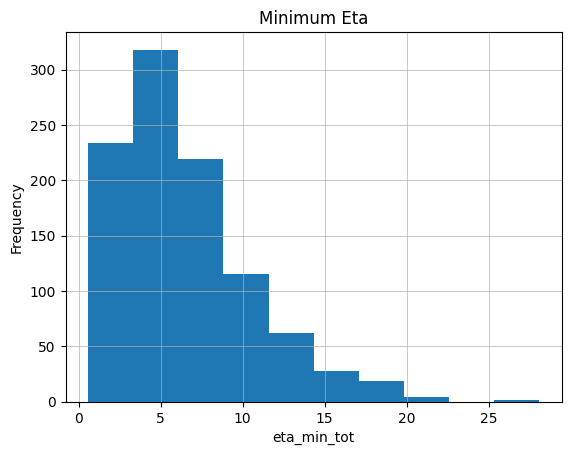

In [36]:
import matplotlib.pyplot as plt

plt.hist(df_gen[0]['eta_min_tot'], bins=10) 
plt.xlabel('eta_min_tot')
plt.ylabel('Frequency')
plt.title('Minimum Eta')
#plt.xlim([0, 200])
plt.grid(True, which='both', linewidth=0.5)
plt.show()

We can clearly see that the generator has generated samples that are distributed arround our requested value range. Due to the design error that was visualised above with the evaluate_generation()- plot there is some scatter, however the peak of the distribution is nicely positioned in the requested range.

The scatter can be reduced with increasing by using oversampling. In the following we set the over sampling to 5, which means the generator will generate 5 times more samples than requested and select the best 20% among them.





In [37]:
#request
request={'eta_min_tot': [1,3]}

#generation with the decoder
gen.over_sample = 5
df_gen = gen.generation(request, n_samples = 1000, format_out='df')



###########
Error during generation
###########

* Errors when requesting: eta_min_tot = [1.0, 3.0]
Mean for 1000 samples: 0.18733163
Mean for 100.0 sample(s): 0.0

Best sample: 2.9881082



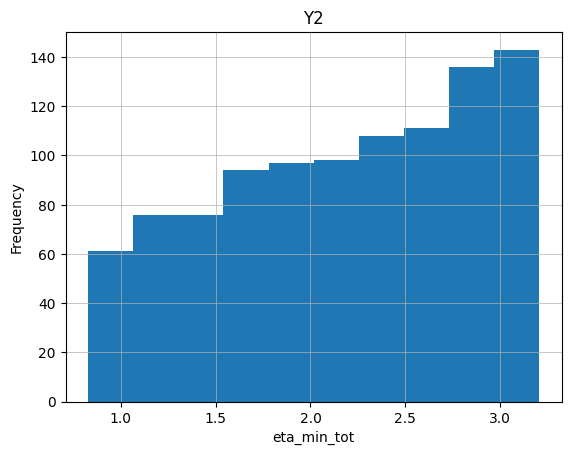

In [38]:
import matplotlib.pyplot as plt

plt.hist(df_gen[0]['eta_min_tot'], bins=10) 
plt.xlabel('eta_min_tot')
plt.ylabel('Frequency')
plt.title('Y2')
#plt.xlim([0, 200])
plt.grid(True, which='both', linewidth=0.5)
plt.show()

Furthermore, we can not only condition on a single attribute, but on multiple attributes at the same time.

In [54]:
#defining generation goals
perf_request={'eta_min_tot':[1,3], 'GWP': [0,16000]}

# generating designs (considerun perf_request)
df_gen = gen.generation(perf_request, n_samples = 100000, format_out='df')[0]

df_gen



###########
Error during generation
###########

* Errors when requesting: eta_min_tot = [1.0, 3.0], GWP = [0.0, 16000.0]
Mean for 100000 samples: 0.8153469, 0.0
Mean for 10000.0 sample(s): 0.0, 0.0

Best sample: 1.1663861, 12945.064



,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,...,fsy,s,beta,eta_min_tot,AP,GWP,ADP-minerals-metals,ADP-fossil,ODP,POCP
0,4288.909668,10671.063477,382.442932,327.605347,4337.480957,15.566685,21.680189,12.0,202.935699,18.486008,...,620.534668,0.547277,-46.231804,1.166386,23.743610,12945.064453,0.037623,107305.015625,0.000167,4.288078
1,4890.511230,8989.634766,429.224792,337.424255,4316.177246,21.576044,21.020958,12.0,158.932556,16.831062,...,584.586060,0.505361,-28.718811,2.438150,24.266586,13553.012695,0.033072,108777.765625,0.000189,4.843277
2,4445.801758,9311.033203,417.967377,374.362610,4610.864746,19.762758,18.377804,12.0,136.733597,13.268961,...,584.278748,0.429869,3.796127,1.928526,27.536165,15937.540039,0.042414,118127.718750,0.000190,5.055752
3,5324.793945,9648.775391,401.230042,320.274078,3751.033691,16.092632,16.126341,12.0,120.588989,13.652602,...,613.204834,0.393546,-18.864265,1.492590,25.273003,14374.785156,0.038931,113051.671875,0.000186,4.873296
4,3928.005859,16911.708984,272.718323,308.175781,3480.357422,16.232300,18.264816,12.0,167.022400,14.382339,...,630.317383,0.611550,-1.107292,1.149796,27.340757,15754.415039,0.040336,130907.148438,0.000210,5.521134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4543.677246,12002.259766,340.027466,299.249603,2455.281006,22.086704,18.320242,12.0,143.667923,18.073730,...,648.449402,0.592624,-10.534531,4.854602,22.380428,12602.482422,0.027399,108358.968750,0.000211,5.387198
99996,4877.163574,8940.693359,525.056824,454.101318,3242.449219,17.059631,15.822254,12.0,106.544411,13.293362,...,595.944763,0.600716,15.276108,4.854640,26.556580,15978.790039,0.047637,107460.828125,0.000163,4.589391
99997,3515.713623,13694.338867,303.781189,297.170044,2311.672852,21.130894,22.214657,12.0,135.512436,18.409885,...,646.401855,0.499752,-41.056561,4.854832,19.950779,11147.482422,0.020341,101108.296875,0.000219,5.416548
99998,3742.230713,10830.298828,345.828003,294.031219,2896.864258,25.515953,15.424382,12.0,197.563507,25.785061,...,555.423401,0.422475,46.662430,4.854838,21.008116,11694.896484,0.033114,98218.007812,0.000157,4.143473


array([[<Axes: title={'center': 'eta_min_tot'}>,
        <Axes: title={'center': 'GWP'}>]], dtype=object)

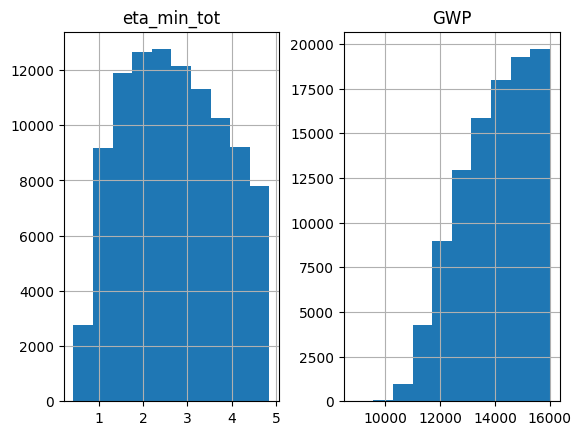

In [58]:
df_gen[['eta_min_tot', 'GWP']].hist()

array([[<Axes: title={'center': 'L'}>, <Axes: title={'center': 'b1'}>],
       [<Axes: title={'center': 'h_w'}>, <Axes: >]], dtype=object)

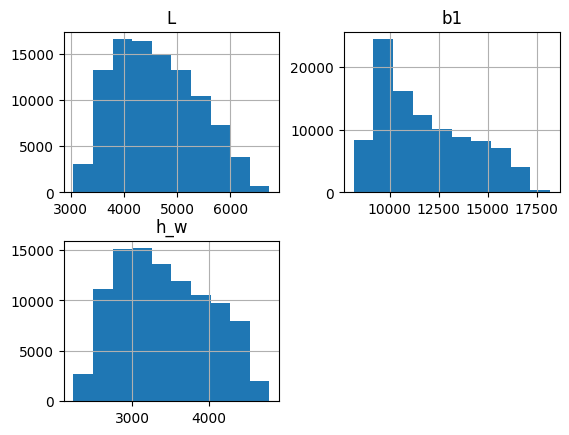

In [59]:
df_gen[['L','b1','h_w']].hist()

In [69]:
# filtering generated designs to fullfill parameter constraints
param_constraints={'Span': 5, 'Clearance': 3, 'Width': 10}

eps=500
L_req=param_constraints['Span']*1000
b_req=param_constraints['Width']*1000
h_req=param_constraints['Clearance']*1000

request_fulfilled= (df_gen['L']<= (L_req+eps)) & (df_gen['L']> (L_req-eps)) & (df_gen['b1']<= (b_req+eps)) & (df_gen['b1']> (b_req-eps)) & (df_gen['h_w']<= (h_req+eps)) & (df_gen['h_w']> (h_req-eps))
df_gen_filt= df_gen[request_fulfilled]

df_gen_filt


,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,...,fsy,s,beta,eta_min_tot,AP,GWP,ADP-minerals-metals,ADP-fossil,ODP,POCP
143,5061.136719,9607.569336,441.014404,318.188324,3162.478516,19.780312,17.264015,12.0,161.023071,19.410912,...,620.771667,0.344622,-33.581036,2.898254,21.599239,11861.389648,0.027457,101927.117188,0.000188,4.731245
202,5177.216309,10239.951172,411.093781,300.630219,3035.101562,17.483376,15.350566,12.0,164.426590,18.267870,...,639.986145,0.345102,-28.136448,1.916245,21.640909,11934.792969,0.029557,101310.750000,0.000176,4.471049
261,5304.263672,10221.570312,371.239716,333.439880,3341.645996,18.171213,18.120314,12.0,109.226410,16.119263,...,610.571228,0.361801,-35.616131,2.580379,24.648979,13868.787109,0.031294,115282.015625,0.000221,5.616403
357,5455.665039,9876.828125,549.227173,431.562103,3267.147461,16.350752,17.223503,12.0,222.309082,17.307043,...,619.853455,0.498254,21.214661,2.602336,25.778072,14626.251953,0.042924,112855.968750,0.000167,4.454289
396,4959.589844,9606.330078,494.300873,331.278503,3485.696777,18.157925,16.506824,12.0,204.909607,17.545307,...,623.168518,0.387445,-6.182297,2.006046,22.029106,12066.703125,0.032201,101642.851562,0.000166,4.258303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99912,5496.398438,9737.861328,536.780457,342.971313,2556.150635,19.646072,18.222504,12.0,187.761749,20.455025,...,632.287476,0.688919,-4.137825,4.848760,26.471067,15214.573242,0.041682,114482.523438,0.000186,4.983614
99917,4939.371582,9872.623047,459.256134,394.511169,2975.248535,18.372276,16.744116,12.0,94.693336,12.286956,...,586.589539,0.399663,17.913551,4.849085,25.635660,15010.532227,0.037465,112027.375000,0.000206,5.530949
99922,4995.425781,10079.567383,513.733154,387.362427,2878.544922,21.701059,16.282566,12.0,176.219055,20.485016,...,590.085022,0.631800,16.410378,4.849525,26.438854,15272.679688,0.043943,113321.101562,0.000178,4.818371
99942,5349.044922,10327.237305,424.488678,386.497986,2839.360596,18.485855,17.359230,12.0,99.929001,14.361266,...,621.899292,0.508817,-2.038902,4.851071,26.371923,15168.947266,0.036624,118377.296875,0.000222,5.832088


In [94]:
ID=143
df_plot=df_gen_filt

t_p=df_plot['t_p'][ID]
t_w=df_plot['t_w'][ID]
L=df_plot['L'][ID]
b=df_plot['b1'][ID]
h_w=df_plot['h_w'][ID]
h=h_w+t_p

d1_plate=df_plot['d1_plate'][ID]
d4_plate=df_plot['d4_plate'][ID]
d2_plate=df_plot['d2_plate'][ID]
d3_plate=df_plot['d3_plate'][ID]

h
L

KeyError: 'd3_plate'

In [85]:
import plotly.graph_objects as go
import numpy as np

# Creating a grid of values for plotting
x = np.linspace(0, b, 100)
y = np.linspace(0, L, 100)
x_p, y_p = np.meshgrid(x, y)
z_p = 0*x_p*y_p
z_p_l=-t_p+0*x_p*y_p



z= np.linspace(0, -h, 100)
x_w, z_w = np.meshgrid(x, z)
y_w1=0*x*z
y_w2=L+0*x*z

# Create a figure
fig = go.Figure()

colors = ['black', 'darkgray', 'darkgray']
# Add surfaces
#fig.add_trace(go.Surface(z=z_p_l, x=x_p, y=y_p, opacity=0.5, name='Deck Slab', colorscale=[colors[0], colors[0]], showscale=False))
fig.add_trace(go.Surface(z=z_p, x=x_p, y=y_p, opacity=0.5, name='Deck Slab', colorscale=[colors[0], colors[0]], showscale=False))
fig.add_trace(go.Surface(z=z_w, x=x_w, y=y_w1, opacity=0.5, name='Wall 1', colorscale=[colors[1], colors[1]], showscale=False))
fig.add_trace(go.Surface(z=z_w, x=x_w, y=y_w2, opacity=0.5, name='Wall 3', colorscale=[colors[2], colors[2]], showscale=False))


# Add dummy traces for legend
for i, name in enumerate(['Deck Slab', 'Wall 1', 'Wall 3']):
    fig.add_trace(go.Scatter3d(x=[None], y=[None], z=[None], mode='markers',
                               marker=dict(size=10, color=colors[i]),
                               legendgroup=name, showlegend=True, name=name))


# Update the layout
fig.update_layout(
    title='3D Plot of Three Planes',
    showlegend=True,
    legend_title="Surfaces",
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    )
)
fig.show()

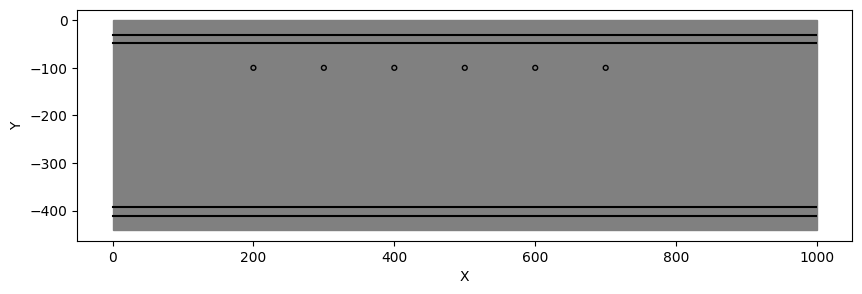

In [101]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the coordinates for the horizontal lines
x_values = range(0, 1000) # 1m plate section
y_values_line2 = [-30 for _ in x_values]
y_values_line3 = [-30-d4_plate for _ in x_values]
y_values_line4 = [-t_p+30+d1_plate for _ in x_values]
y_values_line5 = [-t_p+30 for _ in x_values]


# Define the coordinates for the dots
dot_x_values = [200, 300, 400, 500, 600, 700]
dot_y_values = [-100 for _ in dot_x_values]

# Create the plot
plt.figure(figsize=(10, 3))

# Define the lower left corner (llx, lly), width and height of the rectangle
llx, lly, width, height = 0, 0, 1000, -t_p  # Example values

# Create a Rectangle patch
rect = patches.Rectangle((llx, lly), width, height, linewidth=1, edgecolor='gray', facecolor='gray', zorder=0)

# Add the rectangle to the Axes
plt.gca().add_patch(rect)

# Plot the horizontal lines

plt.plot(x_values, y_values_line2, 'k-')
plt.plot(x_values, y_values_line3, 'k-')
plt.plot(x_values, y_values_line4, 'k-')
plt.plot(x_values, y_values_line5, 'k-')


# Plot the round dots
plt.scatter(dot_x_values, dot_y_values, s=d2_plate, facecolors='none', edgecolors='k')  # 'k' is for black color

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')

# Set the axes limits
# plt.xlim(0, 10)
# plt.ylim(0, 10)

# Show the plot
plt.show()

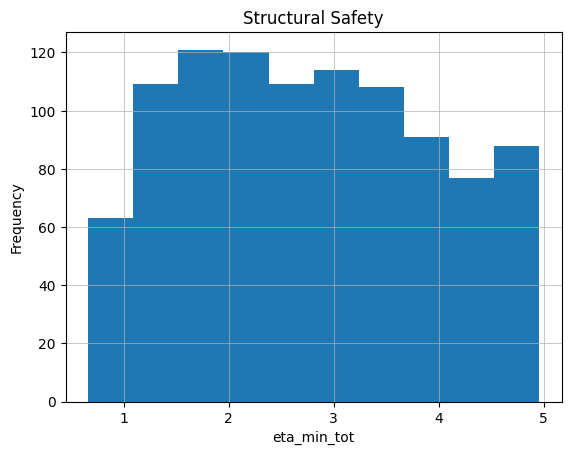

In [40]:
import matplotlib.pyplot as plt

plt.hist(df_gen[0]['eta_min_tot'], bins=10) 
plt.xlabel('eta_min_tot')
plt.ylabel('Frequency')
plt.title('Structural Safety')
#plt.xlim([0, 200])
plt.grid(True, which='both', linewidth=0.5)
plt.show()

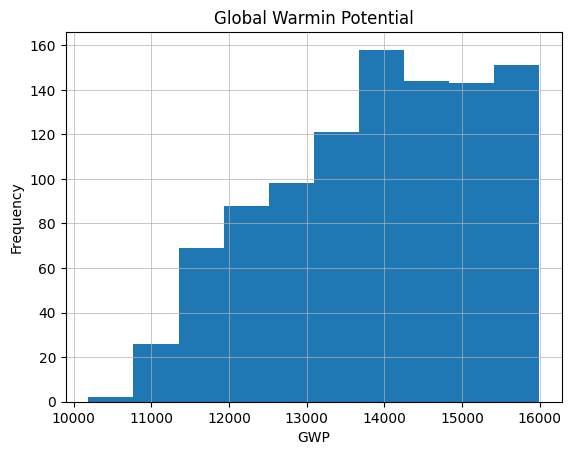

In [41]:
import matplotlib.pyplot as plt

plt.hist(df_gen[0]['GWP'], bins=10) 
plt.xlabel('GWP')
plt.ylabel('Frequency')
plt.title('Global Warmin Potential')
#plt.xlim([0, 200])
plt.grid(True, which='both', linewidth=0.5)
plt.show()

##### (ii) Forward Design: Predictions

We can also use the encoder model to evaluate a large amount of samples in quasi-real time. This can be beneficial for example for the optimisation of the design.


To show this functionality we here import a large amount of design parameter vectors from a csv fil to be evaluated by the trained encoder


In [ ]:
df = pd.read_csv('analytical_function_samples.csv')
df

In [ ]:
from typing import Tuple
import torch


#TODO: After merge request is accepted -> change to cae.forward_evaluation() function

# Convert the selected columns to PyTorch tensors
x_data = torch.tensor(df[['x1', 'x2']].values, dtype=torch.float32)
y_data = torch.tensor(df[['y1', 'y2']].values, dtype=torch.float32)

# Create a tuple containing the input tensors 'x' and the conditional part 'y'
#Technically y is not necessary here! take out when possible
data_tuple: Tuple[torch.Tensor, torch.Tensor] = (x_data, y_data)
data_tuple= (x_data, y_data)

# feed to encoder to make prediction
predictions=cae.predict(data_tuple)
df_pred=pd.DataFrame(predictions['y_org_space'],columns=['y1','y2'])
df_pred[['x1','x2']]=df[['x1','x2']]
df_pred.head()

In [ ]:
# Soon to be merged: Easy forward evaluation
# df_pred=cae.forward_evaluation(df[['x1','x2']], format_out="true", normalize_in=False)
# df_pred

If we plot the predictions made by the encoder against the actual surfaces of the analytical function we can see that the model learned the surfaces accurately. 